# 2.3 NYC CITYBIKE & NOAA WEATHER ANALYSIS

In [1]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
from scipy.stats import gaussian_kde

In [2]:
# Checking matplotlib version

import matplotlib as mpl


In [3]:
#Import csv

df = pd.read_csv(r'C:\Users\carol\Documents\Data Specialization\nyc_noaa_analysis\nyc_data.csv',index_col = 0)

C:\Users\carol\AppData\Local\Temp\ipykernel_4344\3305402741.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\carol\Documents\Data Specialization\nyc_noaa_analysis\nyc_data.csv',index_col = 0)


In [4]:
# completing df checks

df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
#remove column _merge
df.drop(columns='_merge', inplace= True)

In [6]:
df.shape

(29838806, 15)

In [7]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [8]:
# date comes as an object changing to dateime64

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
# 3. Drop rows with invalid 'date' or 'avgTemp'
df = df.dropna(subset=['date', 'avgTemp'])

In [10]:
#Checking changes on date from object to datetime64

df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

# BASIC PLOTTING WITH PANDAS

In [11]:
# Making date the df index

df_temp = df.set_index('date')

In [12]:
#Checking data

df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


In [13]:
# 5. Adjust Matplotlib settings to handle large data
mpl.rcParams['agg.path.chunksize'] = 10000  # Adjust chunk size to process large plots
mpl.rcParams['path.simplify'] = True        # Simplify paths for performance
mpl.rcParams['path.simplify_threshold'] = 0.5  # Adjust threshold for path simplification


In [14]:
#Downsample the data for efficiency

N = 10  # Take every 10th row
df_temp_downsampled = df_temp.iloc[::N, :]

In [15]:
df_temp_downsampled.shape

(2983817, 14)

In [17]:
#Plot the data by the date index
df_temp_downsampled = df_temp_downsampled.sort_index()

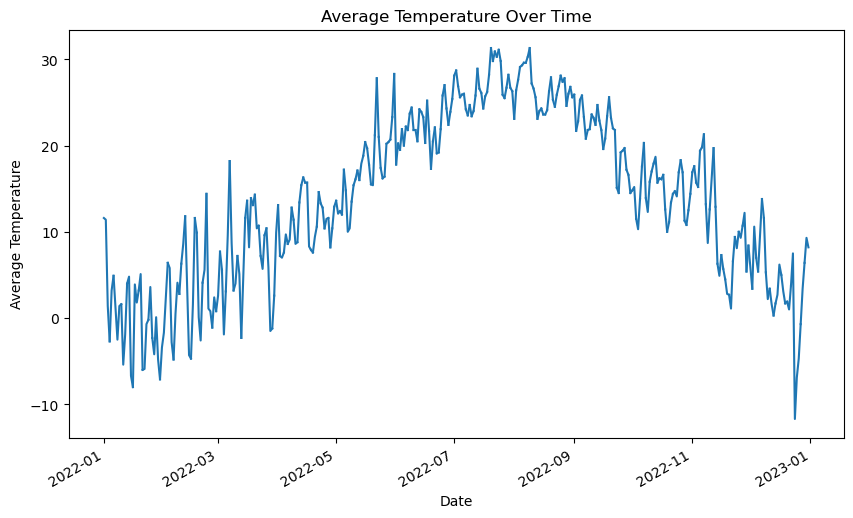

In [18]:
# Creating a line plot  with a average temperature as a time series

plt.figure(figsize=(10, 6))  # Adjust figure size
df_temp_downsampled['avgTemp'].plot(title='Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

# AGGREGATE TRIPS

In [19]:
df_temp_downsampled.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [21]:
# Groupby the count of trips per date

df_group = pd.DataFrame(df_temp_downsampled.groupby(['date'])['ride_id'].count()).reset_index()

In [22]:
#Checking data on df_group

df_group.head()

,date,ride_id
0,2022-01-01,2048
1,2022-01-02,4333
2,2022-01-03,3314
3,2022-01-04,3687
4,2022-01-05,3321


In [23]:
# rename column ['trip_id']

df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [24]:
# merge df_group (date + bike_rides_daily) with df (outer join)

df2 = df_temp_downsampled.merge(df_group, on='date', how='outer', indicator='merge_flag')

In [25]:
print(df2['merge_flag'].value_counts(dropna = False))

merge_flag
both          2983817
left_only           0
right_only          0
Name: count, dtype: int64


In [26]:
#Checking df after merging with the trips counts

df2.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,merge_flag
0,2022-01-01,857218FA8A3EB2F7,electric_bike,2022-01-01 14:40:15.019,2022-01-02 15:40:09.403,W 100 St & Broadway,7580.01,NaN,NaN,40.797372,-73.970412,NaN,NaN,member,11.6,2048,both
1,2022-01-01,6DA31749533F59F8,classic_bike,2022-01-01 16:51:13.454,2022-01-01 17:21:09.414,Prospect Park SW & Greenwood Ave,3385.06,Prospect Park SW & Greenwood Ave,3385.06,40.652563,-73.972573,40.652563,-73.972573,casual,11.6,2048,both
2,2022-01-01,D4E10A34116FBFA5,classic_bike,2022-01-01 19:56:15.592,2022-01-01 20:00:56.587,4 Ave & 3 St,4028.04,Bergen St & 4 Ave,4322.06,40.673746,-73.985649,40.682564,-73.979898,member,11.6,2048,both
3,2022-01-01,2159E131195A12F2,electric_bike,2022-01-01 15:47:55.063,2022-01-01 15:54:31.468,Dock 72 Way & Market St,4804.02,Dock St & Front St,4903.09,40.699850,-73.971410,40.702709,-73.992530,member,11.6,2048,both
4,2022-01-01,047DAE6A95BBA544,classic_bike,2022-01-01 15:25:46.801,2022-01-01 16:15:55.900,Amsterdam Ave & W 82 St,7360.1,Central Park West & W 85 St,7354.01,40.785247,-73.976673,40.784760,-73.969862,member,11.6,2048,both


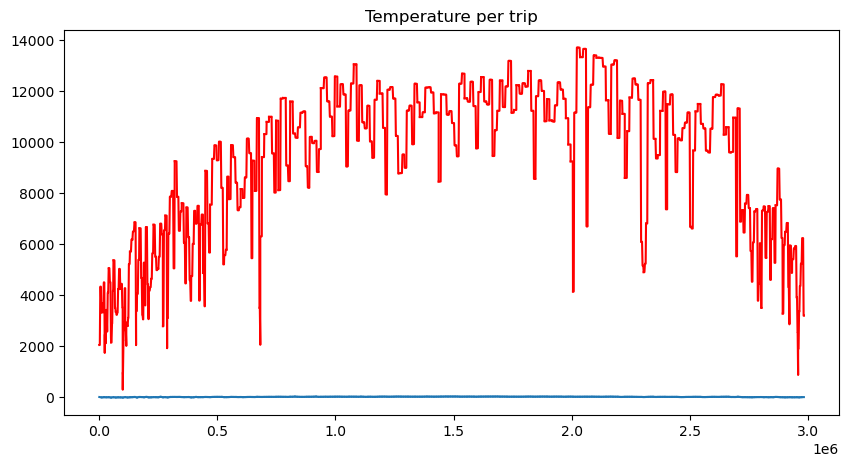

In [27]:
# Create a line chart with the AvgTemp and the trip counts

plt.figure(figsize = (10,5))
plt.title ('Temperature per trip')
plt.plot(df2['avgTemp'])
plt.plot(df2['bike_rides_daily'], color = 'red')

# CREATE A DUAL PLOT

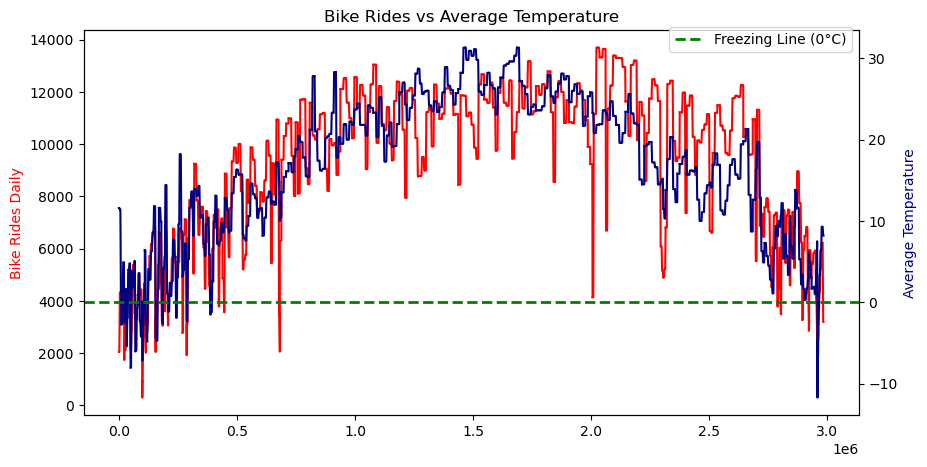

In [34]:
import matplotlib.pyplot as plt  # Import the plotting library

# Create a figure and primary axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df2['bike_rides_daily'], color='red')
ax.set_ylabel('Bike Rides Daily', color='red')  # Add label for clarity

# Add a secondary axis for temperature
ax2 = ax.twinx()
ax2.plot(df2['avgTemp'], color='navy')
ax2.set_ylabel('Average Temperature', color='navy')  # Add label for clarity

# Add a freezing line at 0°C on the temperature axis
ax2.axhline(y=0, color='green', linestyle='--', linewidth=2, label='Freezing Line (0°C)')

# Add a legend to the plot
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))  # Position the legend

# Title and display
plt.title("Bike Rides vs Average Temperature")
plt.show()

In this visualization, I used Matplotlib to create a dual-axis time series plot, showcasing the relationship between daily bike rides and average temperature. I applied the object-oriented programming (OOP) paradigm in Matplotlib, which provides more control and flexibility over the plot.

In [39]:
df2.dtypes

date                         datetime64[ns]
ride_id                              object
rideable_type                        object
started_at                           object
ended_at                             object
start_station_name                   object
start_station_id                     object
end_station_name                     object
end_station_id                       object
start_lat                           float64
start_lng                           float64
end_lat                             float64
end_lng                             float64
member_casual                        object
avgTemp                             float64
bike_rides_daily                      int64
merge_flag                         category
bike_rides_daily_smoothed           float64
avgTemp_smoothed                    float64
dtype: object

Text(0, 0.5, 'Frequency (Days)')

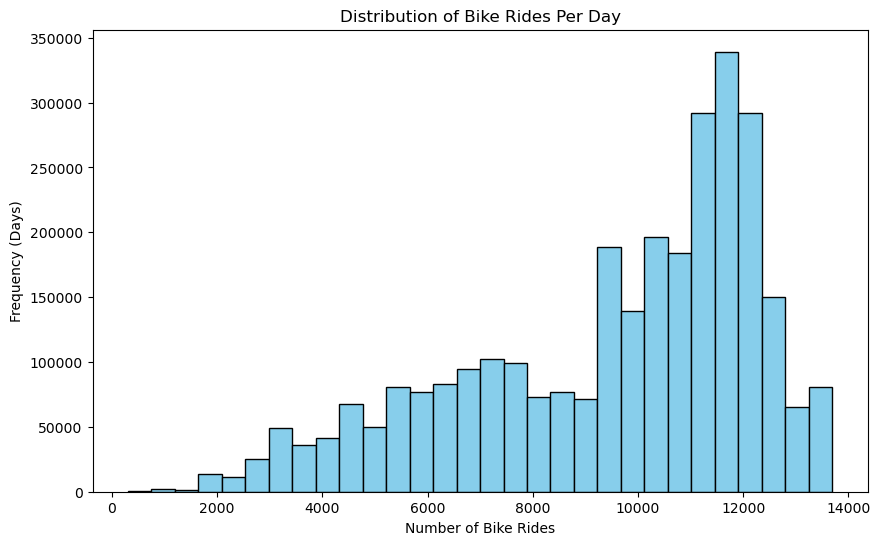

In [48]:
# Create a histogram of the number of bike rides per day
plt.figure(figsize=(10, 6))
plt.hist(df2['bike_rides_daily'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins for granularity

# Add labels and title
plt.title("Distribution of Bike Rides Per Day")
plt.xlabel("Number of Bike Rides")
plt.ylabel("Frequency (Days)")

# BONUS TRACK 

In [50]:
# Convert 'started_at' and 'ended_at' columns to datetime
df2['started_at'] = pd.to_datetime(df2['started_at'])
df2['ended_at'] = pd.to_datetime(df2['ended_at'])

In [51]:
# Calculate trip duration as the difference between 'ended_at' and 'started_at'
df2['trip_duration'] = (df2['ended_at'] - df2['started_at']).dt.total_seconds() / 60  # Convert to minutes

In [55]:
# Display the updated DataFrame
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,merge_flag,trip_duration
date,,,,,,,,,,,,,,,,,
2022-01-01,857218FA8A3EB2F7,electric_bike,2022-01-01 14:40:15.019,2022-01-02 15:40:09.403,W 100 St & Broadway,7580.01,NaN,NaN,40.797372,-73.970412,NaN,NaN,member,11.6,2048,both,1499.906400
2022-01-01,6DA31749533F59F8,classic_bike,2022-01-01 16:51:13.454,2022-01-01 17:21:09.414,Prospect Park SW & Greenwood Ave,3385.06,Prospect Park SW & Greenwood Ave,3385.06,40.652563,-73.972573,40.652563,-73.972573,casual,11.6,2048,both,29.932667
2022-01-01,D4E10A34116FBFA5,classic_bike,2022-01-01 19:56:15.592,2022-01-01 20:00:56.587,4 Ave & 3 St,4028.04,Bergen St & 4 Ave,4322.06,40.673746,-73.985649,40.682564,-73.979898,member,11.6,2048,both,4.683250
2022-01-01,2159E131195A12F2,electric_bike,2022-01-01 15:47:55.063,2022-01-01 15:54:31.468,Dock 72 Way & Market St,4804.02,Dock St & Front St,4903.09,40.699850,-73.971410,40.702709,-73.992530,member,11.6,2048,both,6.606750
2022-01-01,047DAE6A95BBA544,classic_bike,2022-01-01 15:25:46.801,2022-01-01 16:15:55.900,Amsterdam Ave & W 82 St,7360.1,Central Park West & W 85 St,7354.01,40.785247,-73.976673,40.784760,-73.969862,member,11.6,2048,both,50.151650


In [53]:
df2 = df2.drop(columns=['bike_rides_daily_smoothed', 'avgTemp_smoothed'])

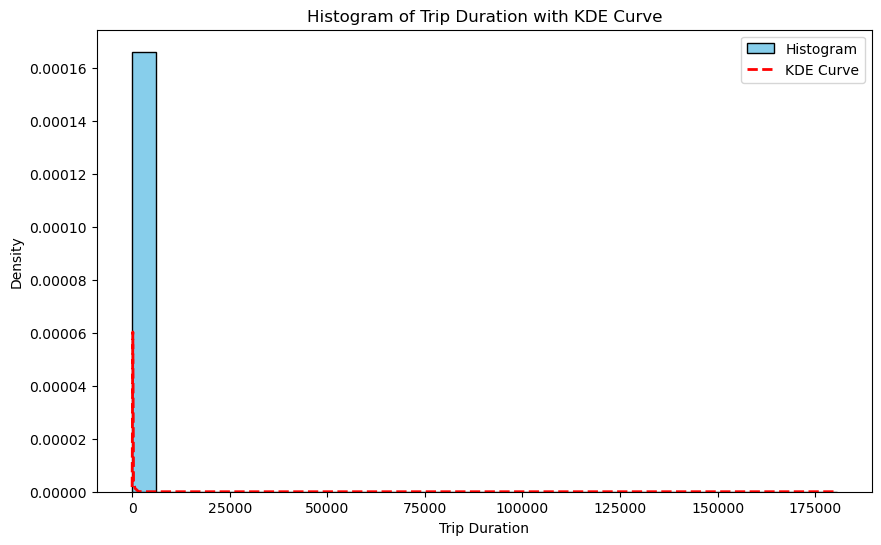

In [59]:
# Histogram of 'tripduration'
fig, ax1 = plt.subplots(figsize=(10, 6))
tripduration = df2['trip_duration'].dropna()
bins = 30  # Number of bins
counts, edges, patches = ax1.hist(tripduration, bins=bins, color='skyblue', edgecolor='black', density=True, label='Histogram')

# KDE Curve (Kernel Density Estimation)
kde = gaussian_kde(tripduration)
x = np.linspace(min(tripduration), max(tripduration), 1000)
ax1.plot(x, kde(x), color='red', linestyle='--', linewidth=2, label='KDE Curve')

# Labels and Title
ax1.set_title("Histogram of Trip Duration with KDE Curve")
ax1.set_xlabel("Trip Duration")
ax1.set_ylabel("Density")
ax1.legend()


1. Most of the values for trip_duration are extremely small (close to zero).
2. The majority of the data points are located in the first bin, indicating that most trips have very short durations.
3. The histogram's density is extremely small because the range of trip_duration values is large, but most observations are concentrated in a small range. This causes the KDE curve to appear flat and uninformative beyond the first bin.
4. Outliers with extremely large trip durations may be affecting the visualization.

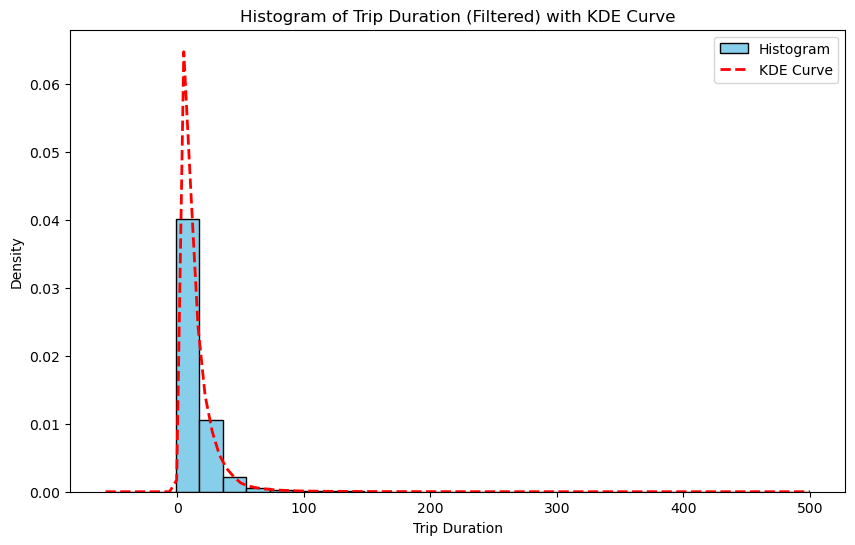

In [63]:
df_filtered = df2[df2['trip_duration'] < 500]  # Example: keep trips < 500 minutes

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['trip_duration'], bins=30, density=True, color='skyblue', edgecolor='black', label='Histogram')
kde = gaussian_kde(df_filtered['trip_duration'])
x = np.linspace(df_filtered['trip_duration'].min(), df_filtered['trip_duration'].max(), 100)
plt.plot(x, kde(x), color='red', linestyle='--', linewidth=2, label='KDE Curve')
plt.title("Histogram of Trip Duration (Filtered) with KDE Curve")
plt.xlabel("Trip Duration")
plt.ylabel("Density")
plt.legend()
plt.show()

# CREATE A HISTOGRAM

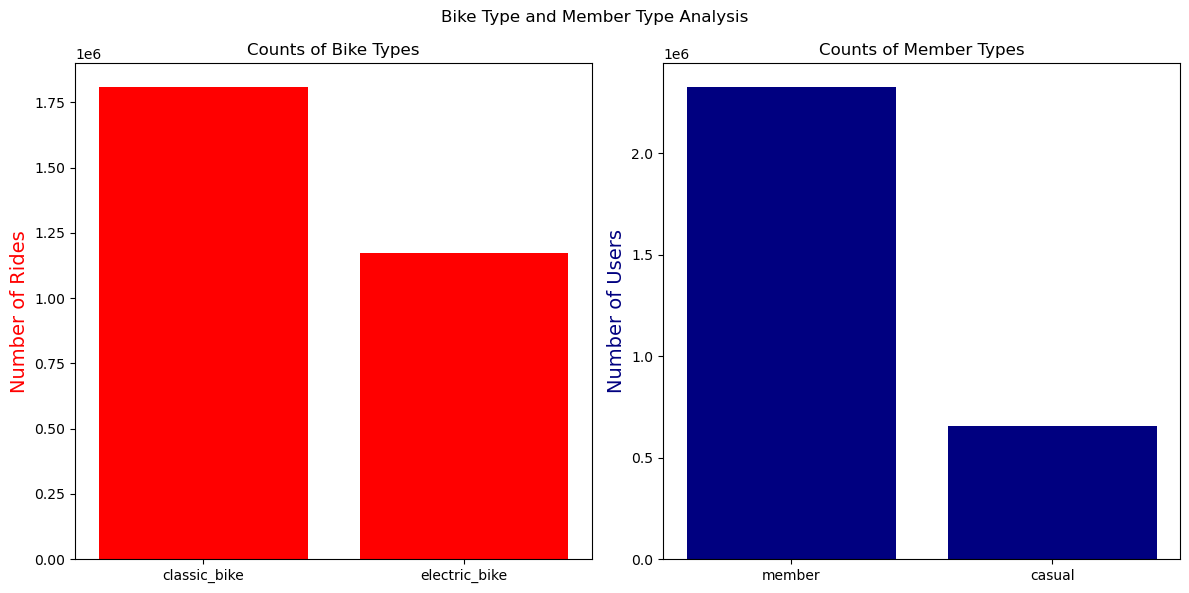

In [70]:
import matplotlib.pyplot as plt

# Count the number of classic and electric bikes
bike_counts = df2['rideable_type'].value_counts()

# Count the number of members and casual users
member_counts = df2['member_casual'].value_counts()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the counts of rideable types
ax[0].bar(bike_counts.index, bike_counts.values, color='red')
ax[0].set_title('Counts of Bike Types')
ax[0].set_ylabel('Number of Rides', color='red', fontsize=14)

# Plot the counts of member and casual users
ax[1].bar(member_counts.index, member_counts.values, color='navy')
ax[1].set_title('Counts of Member Types')
ax[1].set_ylabel('Number of Users', color='navy', fontsize=14)

# Set a main title
plt.suptitle('Bike Type and Member Type Analysis')

plt.tight_layout()
plt.show()

In [71]:
df2.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
bike_rides_daily               int64
merge_flag                  category
trip_duration                float64
dtype: object